Research Backed Upon : https://www.thinkwithgoogle.com/feature/youtube-ad-sequencing-and-ad-recall/ad-sequencing?lang=en_US

#1. Import Dependencies

##1.1. Download Dependencies

In [ ]:
!pip install pytube opencv-python
!pip install moviepy
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 770.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00


##1.2. Import Dependencies

In [ ]:
import cv2
import pytube
from pytube import YouTube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
from os.path import isfile, join

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from moviepy.editor import *

#2. Youtube Downloading functions

In [ ]:
def download_video(url, output_path):
  """
  Downloads Video provided the url
  """
  try:
    yt = YouTube(url)
    stream = yt.streams.filter(file_extension='mp4', res='360p').first()
    stream.download(output_path)
    return True
  except Exception as e:
    print(f"Error downloading video: {e}")
    return False



def download_frames(video_path, output_folder):
  """
  Downloads and reads the frame provided the video path
  """
  try:
    video = cv2.VideoCapture(video_path)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_number in range(frame_count):
      success, frame = video.read()
      if not success:
          break
      frame_file_path = f"{output_folder}/frame_{frame_number:04d}.jpg"
      cv2.imwrite(frame_file_path, frame)

    video.release()
    return True
  except Exception as e:
    print(f"Error downloading frames: {e}")
    return False


def download(url):
  if __name__ == "__main__":
    youtube_url = url
    output_path = "./video.mp4"  # desired output path
    output_folder = "./frames"   # desired output folder

    # Download the video
    if download_video(youtube_url, output_path):
      # Download frames
      if download_frames(output_path, output_folder):
        print("Frames downloaded successfully.")
      else:
        print("Failed to download frames.")
    else:
      print("Failed to download video.")


#3. Frame Pixelation Function

In [ ]:
def pixelate_bw(image : np.ndarray , pixel_size : int , thres : int) -> np.ndarray:

  """
  Takes in array of image and returns binary BW pixelated array
  """

  height, width = image.shape[:2]
  w, h = (pixel_size , pixel_size)
  bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thres , image = cv2.threshold(bw_image,thres,255,cv2.THRESH_BINARY)
  image_pixel = cv2.resize(image, (w, h), interpolation=cv2.INTER_LINEAR)
  output = cv2.resize(image_pixel , ( int(width/3) , int(height/3) ), interpolation=cv2.INTER_NEAREST)
  return output

#4. Intensity Analysis Function

In [ ]:
def intensity(path : str) -> (int , np.ndarray , np.ndarray ) :

  """
  Goes through a video and returns list of intensity of a frame with respect to the next frame
  """

  cap = cv2.VideoCapture(path)
  video_clip = VideoFileClip(path)
  intensity_per_frame = []
  audio_array = video_clip.audio.to_soundarray()


  frame_file_path = "/content/video.mp4"
  count = 0
  while cap.isOpened():
    try:
      ret,frame = cap.read()
      frame_bw = pixelate_bw(image = frame , pixel_size = 30 , thres = 200)
      intensity_per_frame.append(frame_bw.sum())
      frame_file_path = f"/content/video_{count}.jpg"
      # cv2.imwrite(frame_file_path, frame_bw)

      count = count + 1
    except:
      break
  x = np.array(intensity_per_frame)

  x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
  audio_per_frame = audio_array[:,0][(audio_array.shape[0] - count) : ]
  y_norm = (audio_per_frame-np.min(audio_per_frame))/(np.max(audio_per_frame)-np.min(audio_per_frame))


  return count , x_norm , y_norm

In [ ]:
#polynomial approximation for the data

def plot_aprroximate(list_1 , list_2 , approx : int , title : str):
  """
  Smoothens the curve
  """
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  plt.title(title)
  plt.show()

##IMDB's top 100 action movies

In [ ]:
!mkdir video.mp4

In [ ]:
%%time

videos_df =  pd.read_csv("action_movies.csv").dropna()
videos_name = videos_df["Movie Title"].to_list()
videos_url = videos_df["Trailer Link"].to_list()

file_name = os.listdir("/content/video.mp4")

for content_number in range(len(videos_url)):
  print(f"{videos_name[content_number]}")
  download(videos_url[content_number])
  print("\n")

Die Hard
Frames downloaded successfully.


Raiders of the Lost Ark
Frames downloaded successfully.


Indiana Jones and the Temple of Doom
Frames downloaded successfully.


Indiana Jones and the Last Crusade
Frames downloaded successfully.


Terminator 2: Judgment Day
Frames downloaded successfully.


Predator
Frames downloaded successfully.


Mad Max 2
Frames downloaded successfully.


RoboCop
Frames downloaded successfully.


Aliens
Frames downloaded successfully.


Point Break
Frames downloaded successfully.


The Rock
Frames downloaded successfully.


Lethal Weapon
Frames downloaded successfully.


Speed
Frames downloaded successfully.


First Blood
Frames downloaded successfully.


Commando
Frames downloaded successfully.


Total Recall
Frames downloaded successfully.


Die Hard with a Vengeance
Frames downloaded successfully.


Con Air
Frames downloaded successfully.


Face/Off
Frames downloaded successfully.


True Lies
Frames downloaded successfully.


Big Trouble in Little Chin

In [ ]:
import warnings

# Ignore all warnings (not recommended unless necessary)
warnings.filterwarnings('ignore')


In [ ]:
%%time

## Goes through Frames of the Downloaded movies and gives the resulting intensity values

file_name = os.listdir("./video.mp4")


combined_array_dict = {}
movie_number = 0

for content_name in file_name:
  if content_name != ".ipynb_checkpoints":
    frames , intensity_per_frame , audio_per_frame = intensity(path = f'/content/video.mp4/{content_name}')

    # Temporary fix for nan issue
    if np.isnan(audio_per_frame).any() == True:
      combination_array = intensity_per_frame
    elif np.isnan(intensity_per_frame).any() == True:
      combination_array = audio_per_frame

    else:
      combination_array = intensity_per_frame * (1.5 * audio_per_frame)

    combined_array_dict[content_name.split("mp4")[0]] = combination_array.tolist()

    # total_array = np.linspace(0.0, 0.0, combination_array.shape[0])
    # total_array += combination_array[:combination_array.shape[0]]

    print(f"movie number: {movie_number+1} : {content_name} has been executed")
    movie_number += 1
    # plot_aprroximate(list_1 = range(combination_array.shape[0]) , list_2 = combination_array , approx = 30 , title = content_name.split(".")[0])



movie number: 1 : The Way of the Dragon (Meng long guo jiang) Trailer.mp4 has been executed
movie number: 2 : Mission Impossible - Fallout (2018) - Official Trailer - Paramount Pictures.mp4 has been executed
movie number: 3 : The Bourne Ultimatum Official Trailer 1 - David Strathairn Movie (2007) HD.mp4 has been executed
movie number: 4 : The Last Boy Scout - Trailer (HD) (1991).mp4 has been executed
movie number: 5 : Return to a better Tomorrow [Sun ying hong boon sik (1994)] - Trailer.mp4 has been executed
movie number: 6 : Bullitt (1968) Official Trailer - Steve McQueen Movie.mp4 has been executed
movie number: 7 : Inception (2010) Official Trailer 1 - Christopher Nolan Movie HD.mp4 has been executed
movie number: 8 : Red Heat 1988 Trailer  Arnold Schwarzenegger  Jim Belushi.mp4 has been executed
movie number: 9 : HEAT - Trailer - (1995) - HQ.mp4 has been executed
movie number: 10 : Official Trailer Die Hard - With a Vengeance (1995).mp4 has been executed
movie number: 11 : Fast Fiv

In [ ]:
# Writing the dictionary to a CSV file

import csv
csv_file = "action_movies100.csv"

# Flatten the dictionary into a list of tuples
flattened_data = [(key, value) for key, value in combined_array_dict.items()]

# Writing to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['movie', 'combined_array'])
    writer.writerows(flattened_data)

In [ ]:
action_movies_df = pd.read_csv("action_movies100.csv")
action_movies_df

,movie,combined_array
0,The Way of the Dragon (Meng long guo jiang) Tr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Mission Impossible - Fallout (2018) - Official...,"[0.03015864471415301, 0.0, 0.03974876926932581..."
2,The Bourne Ultimatum Official Trailer 1 - Davi...,"[0.010282509536859163, 0.010282509536859163, 0..."
3,The Last Boy Scout - Trailer (HD) (1991).,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Return to a better Tomorrow [Sun ying hong boo...,"[0.0005045091939221513, 0.0004924970702573383,..."
...,...,...
91,Cobra - Official Trailer Chiyaan Vikram AR R...,"[0.02777903308143573, 0.03149891625450863, 0.0..."
92,The Raid 2 Berandal Official Trailer 1 (2014) ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
93,The Raid Official US Trailer HD (2011).,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94,48 Hrs (1982) Trailer 1.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
def string_to_float_list(string_data):
    # Remove square brackets and split the string by commas
    values_str = string_data.strip('[]')
    float_list = [float(val.strip()) for val in values_str.split(',')]

    return float_list

In [ ]:
l1 = action_movies_df.iloc[0]["combined_array"]
l1

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
%%time
l1 = string_to_float_list(l1)

In [ ]:
# prompt: stretch or shrink a list based on the length provided

def stretch_or_shrink(list1, length):
  """
  Stretches or shrinks a list to a given length by repeating or removing elements.

  Args:
    list1: The list to be stretched or shrunk.
    length: The desired length of the list.

  Returns:
    A stretched or shrunk list.
  """

  if length < len(list1):
    return list1[:length]
  elif length > len(list1):
    return list1 + [list1[-1]] * (length - len(list1))
  else:
    return list1


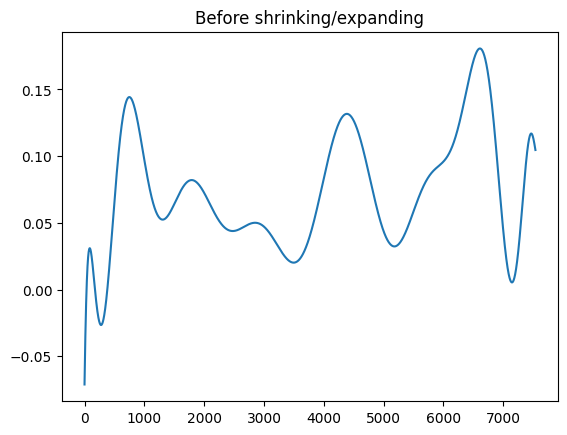

In [ ]:
plot_aprroximate(range(len(l1)) , l1 , approx = 20 , title = "Before shrinking/expanding")

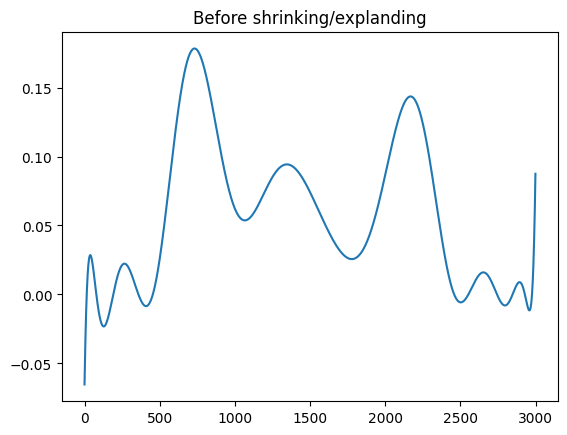

In [ ]:
l2 = stretch_or_shrink(list1 = l1 , length = 3000)

plot_aprroximate(range(len(l2)) , l2 , approx = 20 , title = "Before shrinking/explanding")